**EXPLORATORY DATA ANALYSIS OF COVID-19 USING DATA VISUALIZATION AND DATA ANALYSIS**


IMPORTING THE LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

READING FILE PATH

In [ ]:
df  = pd.read_csv("/content/covid_19_india.csv")

In [ ]:
df.head()


,Sno,Date,Time,State,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,1/30/2020,6:00 PM,Kerala,1,0,0,0,1
1,2,1/31/2020,6:00 PM,Kerala,1,0,0,0,1
2,3,2/1/2020,6:00 PM,Kerala,2,0,0,0,2
3,4,2/2/2020,6:00 PM,Kerala,3,0,0,0,3
4,5,2/3/2020,6:00 PM,Kerala,3,0,0,0,3


In [ ]:
df.tail()

,Sno,Date,Time,State,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
18105,18106,8/11/2021,8:00 AM,Telangana,-,-,638410,3831,650353
18106,18107,8/11/2021,8:00 AM,Tripura,-,-,77811,773,80660
18107,18108,8/11/2021,8:00 AM,Uttarakhand,-,-,334650,7368,342462
18108,18109,8/11/2021,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812
18109,18110,8/11/2021,8:00 AM,West Bengal,-,-,1506532,18252,1534999


In [ ]:
df.describe()

,Sno,Cured,Deaths,Confirmed
count,18110.000000,1.811000e+04,18110.000000,1.811000e+04
mean,9055.500000,2.786375e+05,4052.402264,3.010314e+05
std,5228.051023,6.148909e+05,10919.076411,6.561489e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,4528.250000,3.360250e+03,32.000000,4.376750e+03
50%,9055.500000,3.336400e+04,588.000000,3.977350e+04
75%,13582.750000,2.788698e+05,3643.750000,3.001498e+05
max,18110.000000,6.159676e+06,134201.000000,6.363442e+06


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
print(df.columns)

Index(['Sno', 'Date', 'Time', 'State', 'ConfirmedIndianNational',
       'ConfirmedForeignNational', 'Cured', 'Deaths', 'Confirmed'],
      dtype='object')


In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
grouped_data = df.groupby("State")
print(grouped_data)


In [ ]:
df.groupby("State")

In [ ]:
df.columns = df.columns.str.strip()


In [ ]:
grouped_data = df.groupby("State")
print(grouped_data)

In [ ]:
state_data = df.groupby("State").agg({
    "ConfirmedIndianNational": "sum",
     "ConfirmedForeignNational": "sum",
    "Deaths": "sum",
    "Cured": "sum",
    "Confirmed" :"sum"
}).reset_index()

In [ ]:
print(state_data.head())

                         State  \
0  Andaman and Nicobar Islands   
1               Andhra Pradesh   
2            Arunachal Pradesh   
3                        Assam   
4                        Bihar   

                             ConfirmedIndianNational  \
0  116-------------------------------------------...   
1  11111112335789111214--------------------------...   
2  ----------------------------------------------...   
3  ----------------------------------------------...   
4  2234669---------------------------------------...   

                            ConfirmedForeignNational   Deaths      Cured  \
0  000-------------------------------------------...    27136    1848286   
1  00000000000000000-----------------------------...  2939367  370426530   
2  ----------------------------------------------...    26799    6588149   
3  ----------------------------------------------...   638323   92678680   
4  0000000---------------------------------------...  1093466  125122902   

 

**TOTAL CONFIRMED  COVID-19 CASES**

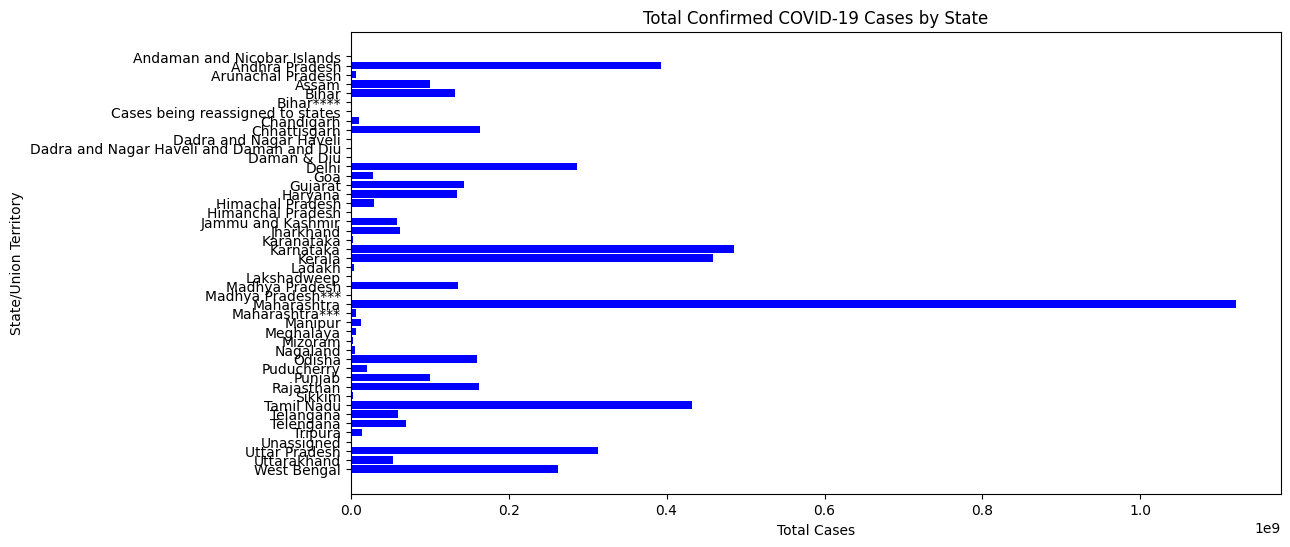

In [ ]:
plt.figure(figsize=(12, 6))
plt.barh(state_data["State"], state_data["Confirmed"], color='blue')
plt.xlabel("Total Cases")
plt.ylabel("State/Union Territory")
plt.title("Total Confirmed COVID-19 Cases by State")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
scaler = MinMaxScaler()
state_data["Deaths_Normalized"] = scaler.fit_transform(state_data[["Deaths"]])

**HEAT MAP STATE VS DEATH**

<ipython-input-25-50a4b2a04d90>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=state_data_sorted["State"], x=state_data_sorted["Deaths"], palette="Reds_r")


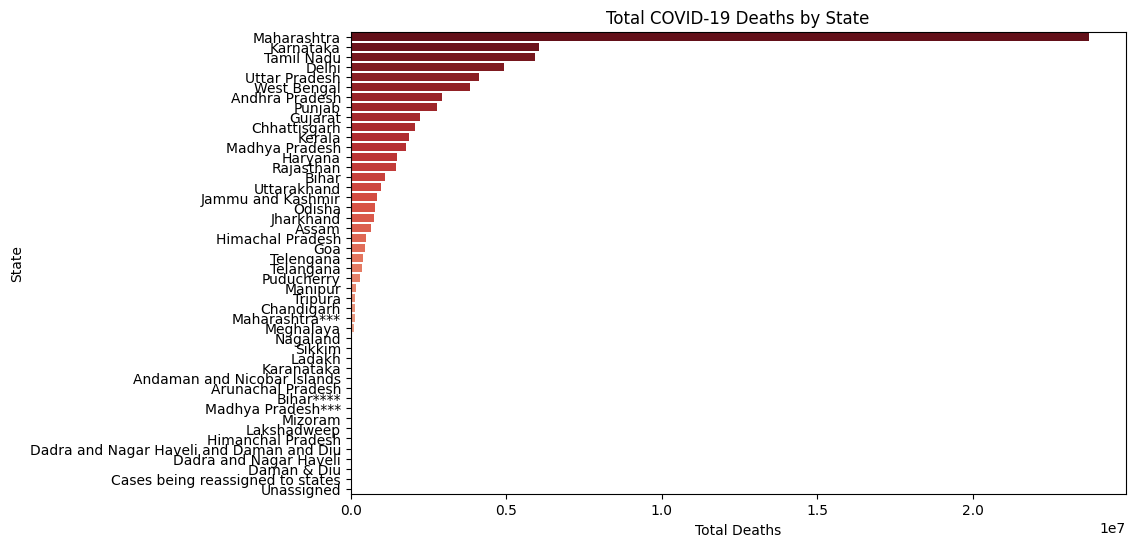

In [ ]:
state_data_sorted = state_data.sort_values(by="Deaths", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(y=state_data_sorted["State"], x=state_data_sorted["Deaths"], palette="Reds_r")
plt.xlabel("Total Deaths")
plt.ylabel("State")
plt.title("Total COVID-19 Deaths by State")
plt.show()

**PIE CHART of Age Group Distribution**

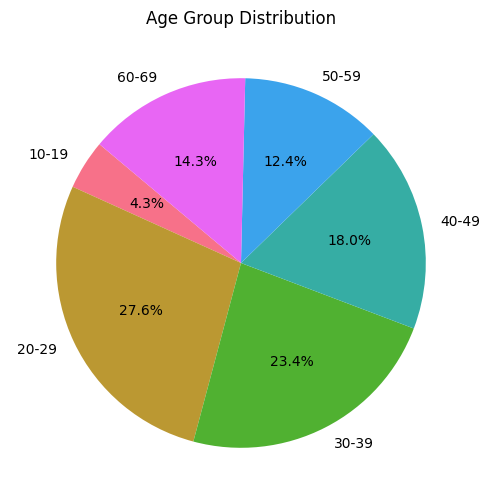

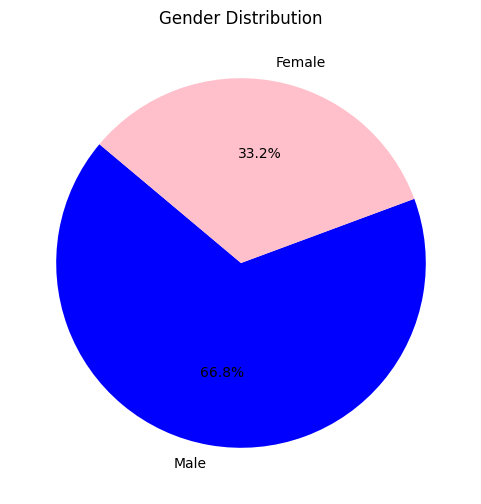

In [ ]:
# Sample data for age group and gender
age_data = {"10-19": 3.9, "20-29": 24.8, "30-39": 21.0, "40-49": 16.2, "50-59": 11.1, "60-69": 12.8}
gender_data = {"Male": 66.76, "Female": 33.24}

# Plot Age Group Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(age_data.values(), labels=age_data.keys(), autopct="%1.1f%%", startangle=140, colors=sns.color_palette("husl", 6))
plt.title("Age Group Distribution")
plt.show()

# Plot Gender Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(gender_data.values(), labels=gender_data.keys(), autopct="%1.1f%%", startangle=140, colors=["blue", "pink"])
plt.title("Gender Distribution")
plt.show()


**LINE CHART DATE vs TIME**

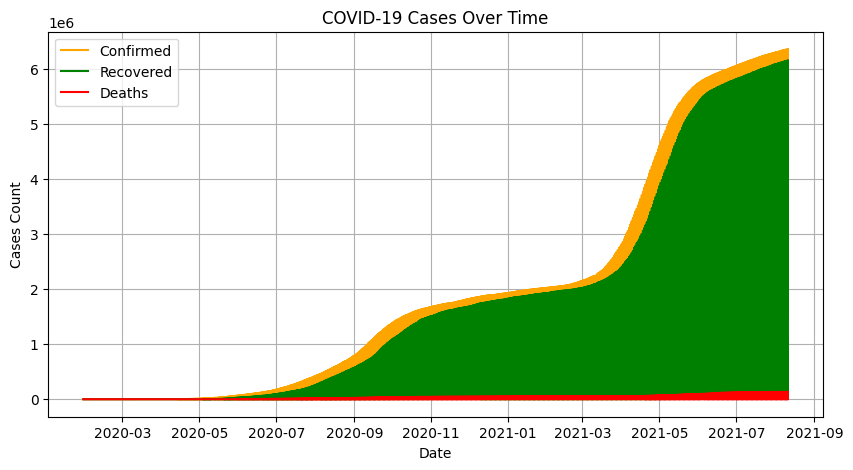

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df["Date"], df["Confirmed"], label="Confirmed", color="orange")
plt.plot(df["Date"], df["Cured"], label="Recovered", color="green")
plt.plot(df["Date"], df["Deaths"], label="Deaths", color="red")
plt.xlabel("Date")
plt.ylabel("Cases Count")
plt.title("COVID-19 Cases Over Time")
plt.legend()
plt.grid()
plt.show()


**BAR CHART**

Index(['Date', 'State', 'TotalSamples', 'Negative', 'Positive'], dtype='object')


<ipython-input-28-d2f153af2d6b>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=state_data_sorted["State"], x=state_data_sorted["TotalSamples"], palette="viridis")


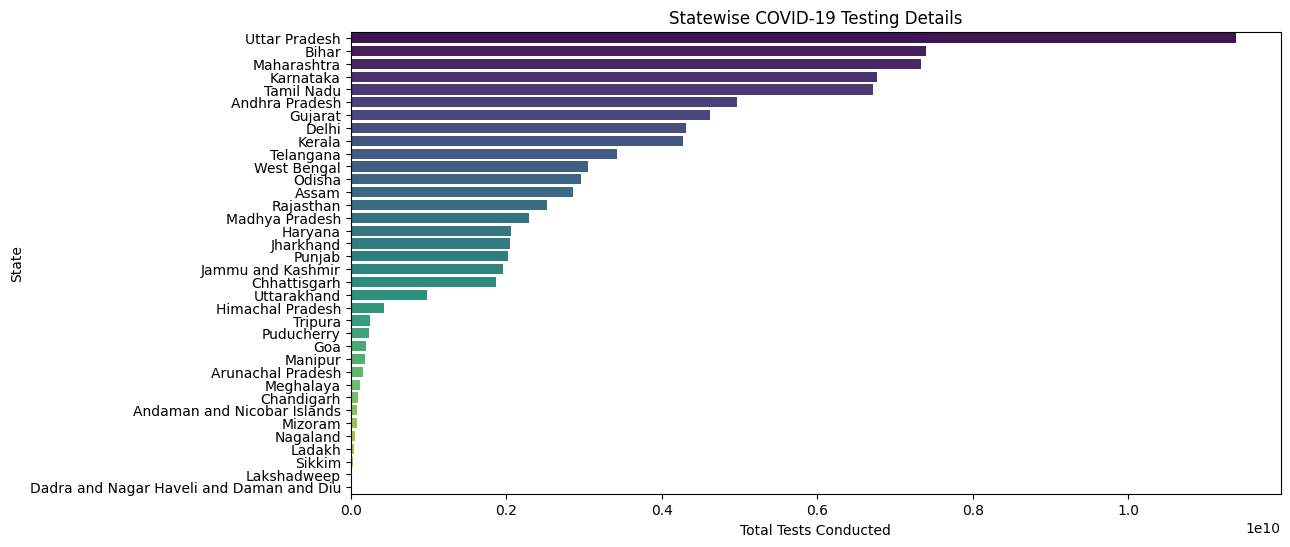

In [ ]:


# Load the dataset
df = pd.read_csv("/content/StatewiseTestingDetails.csv")


print(df.columns)

# Group by state and aggregate total tests
state_data = df.groupby("State").agg({
    "TotalSamples": "sum",
}).reset_index()
state_data_sorted = state_data.sort_values(by="TotalSamples", ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(y=state_data_sorted["State"], x=state_data_sorted["TotalSamples"], palette="viridis")


plt.xlabel("Total Tests Conducted")
plt.ylabel("State")
plt.title("Statewise COVID-19 Testing Details")
plt.show()